# Import Libraries

In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Import Files

In [9]:
reits_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-rwr.xlsx", header=4).dropna()
tech_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xntk.xlsx", header=4).dropna()
aerodefense_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xar.xlsx", header=4).dropna()
banks_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-kbe.xlsx", header=4).dropna()
biotech_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xbi.xlsx", header=4).dropna()
capmarket_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-kce.xlsx", header=4).dropna()
hceq_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xhe.xlsx", header=4).dropna()
hcserv_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xhs.xlsx", header=4).dropna()
homebuild_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xhb.xlsx", header=4).dropna()
insure_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-kie.xlsx", header=4).dropna()
metalsmine_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xme.xlsx", header=4).dropna()
oilserve_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xes.xlsx", header=4).dropna()
oilprod_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xop.xlsx", header=4).dropna()
pharma_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xph.xlsx", header=4).dropna()
regbanks_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-kre.xlsx", header=4).dropna()
retail_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xrt.xlsx", header=4).dropna()
semis_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xsd.xlsx", header=4).dropna()
software_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xsw.xlsx", header=4).dropna()
telecom_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xtl.xlsx", header=4).dropna()
trans_df = pd.read_excel("https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xtn.xlsx", header=4).dropna()

In [11]:
dataframes = [reits_df, tech_df, aerodefense_df, banks_df, biotech_df, capmarket_df, hceq_df, hcserv_df, homebuild_df,
             insure_df, metalsmine_df, oilserve_df, oilprod_df, pharma_df, regbanks_df, retail_df, semis_df, software_df,
             telecom_df, trans_df]

for df in dataframes:
    df.rename(columns={"Ticker": "Symbol"}, inplace=True)

# Define Functions

In [14]:
def clean_symbols(df):
    # Replace "." with "-"
    df['Symbol'] = df['Symbol'].str.replace('.', '-', regex=True)
    return df

def remove_symbols_with_numbers(df):
    df = clean_symbols(df)
    return df[~df['Symbol'].str.contains(r'\d', na=False)]

def calculate_percentage_above_ma(df):
    total_stocks = len(df['Symbol'])  # Total number of stocks in the portfolio
    stocks_above_ma_20 = 0  # Counter for stocks above their 20-day moving average
    stocks_above_ma_50 = 0  # Counter for stocks above their 50-day moving average
    stocks_above_ma_200 = 0  # Counter for stocks above their 200-day moving average

    for symbol in df['Symbol']:
        try:
            # Fetch historical data for the symbol
            data = yf.download(symbol, start='2023-01-01', progress=False)  # Set progress to False

            # Calculate moving averages
            ma_20 = data['Close'].rolling(window=20).mean().iloc[-1]
            ma_50 = data['Close'].rolling(window=50).mean().iloc[-1]
            ma_200 = data['Close'].rolling(window=200).mean().iloc[-1]

            # Get the last closing price
            last_close = data['Close'].iloc[-1]

            # Check if last closing price is above moving averages
            if last_close > ma_20:
                stocks_above_ma_20 += 1
            if last_close > ma_50:
                stocks_above_ma_50 += 1
            if last_close > ma_200:
                stocks_above_ma_200 += 1
        except Exception as e:
            print(f"Error fetching data for symbol {symbol}: {e}")

    percentage_above_ma_20 = (stocks_above_ma_20 / total_stocks) * 100
    percentage_above_ma_50 = (stocks_above_ma_50 / total_stocks) * 100
    percentage_above_ma_200 = (stocks_above_ma_200 / total_stocks) * 100
    return percentage_above_ma_20, percentage_above_ma_50, percentage_above_ma_200

In [17]:
reits_percent_20, reits_percent_50, reits_percent_200 = calculate_percentage_above_ma(reits_df)
tech_percent_20, tech_percent_50, tech_percent_200 = calculate_percentage_above_ma(tech_df)
aerodefense_percent_20, aerodefense_percent_50, aerodefense_percent_200 = calculate_percentage_above_ma(aerodefense_df)
banks_percent_20, banks_percent_50, banks_percent_200 = calculate_percentage_above_ma(banks_df)
biotech_percent_20, biotech_percent_50, biotech_percent_200 = calculate_percentage_above_ma(biotech_df)
capmarket_percent_20, capmarket_percent_50, capmarket_percent_200 = calculate_percentage_above_ma(capmarket_df)
hceq_percent_20, hceq_percent_50, hceq_percent_200 = calculate_percentage_above_ma(hceq_df)
hcserv_percent_20, hcserv_percent_50, hcserv_percent_200 = calculate_percentage_above_ma(hcserv_df)
homebuild_percent_20, homebuild_percent_50, homebuild_percent_200 = calculate_percentage_above_ma(homebuild_df)
insure_percent_20, insure_percent_50, insure_percent_200 = calculate_percentage_above_ma(insure_df)
metalsmine_percent_20, metalsmine_percent_50, metalsmine_percent_200 = calculate_percentage_above_ma(metalsmine_df)
oilserve_percent_20, oilserve_percent_50, oilserve_percent_200 = calculate_percentage_above_ma(oilserve_df)
oilprod_percent_20, oilprod_percent_50, oilprod_percent_200 = calculate_percentage_above_ma(oilprod_df)
pharma_percent_20, pharma_percent_50, pharma_percent_200 = calculate_percentage_above_ma(pharma_df)
regbanks_percent_20, regbanks_percent_50, regbanks_percent_200 = calculate_percentage_above_ma(regbanks_df)
retail_percent_20, retail_percent_50, retail_percent_200 = calculate_percentage_above_ma(retail_df)
semis_percent_20, semis_percent_50, semis_percent_200 = calculate_percentage_above_ma(semis_df)
software_percent_20, software_percent_50, software_percent_200 = calculate_percentage_above_ma(software_df)
telecom_percent_20, telecom_percent_50, telecom_percent_200 = calculate_percentage_above_ma(telecom_df)
trans_percent_20, trans_percent_50, trans_percent_200 = calculate_percentage_above_ma(trans_df)


1 Failed download:
- -: No data found, symbol may be delisted
Error fetching data for symbol -: single positional indexer is out-of-bounds

1 Failed download:
- -: No data found, symbol may be delisted
Error fetching data for symbol -: single positional indexer is out-of-bounds

1 Failed download:
- 1REIM24: No data found, symbol may be delisted
Error fetching data for symbol 1REIM24: single positional indexer is out-of-bounds

1 Failed download:
- -: No data found, symbol may be delisted
Error fetching data for symbol -: single positional indexer is out-of-bounds

1 Failed download:
- -: No data found, symbol may be delisted
Error fetching data for symbol -: single positional indexer is out-of-bounds

1 Failed download:
- MOG.A: No data found, symbol may be delisted
Error fetching data for symbol MOG.A: single positional indexer is out-of-bounds

1 Failed download:
- -: No data found, symbol may be delisted
Error fetching data for symbol -: single positional indexer is out-of-bounds


# Apply Functions

In [68]:
industries = ["Real Estate", "Technology", "Aerospace Defense", "Banks", "Biotech", "Capital Markets", "HealthCare Equipment", 
             "Healthcare Services", "Homebuilders", "Insurance", "Metals Mining", "Oil & Gas Services", "Oil & Gas Production", 
             "Pharmaceuticals", "Regional Banks", "Retail", "Semiconductors", "Software", "Telecom", "Transports"]

percentages_20 = [reits_percent_20, tech_percent_20, aerodefense_percent_20, banks_percent_20, biotech_percent_20,
                 capmarket_percent_20, hceq_percent_20, hcserv_percent_20, homebuild_percent_20, insure_percent_20,
                 metalsmine_percent_20, oilserve_percent_20, oilprod_percent_20, pharma_percent_20, regbanks_percent_20,
                 retail_percent_20, semis_percent_20, software_percent_20, telecom_percent_20, trans_percent_20]

percentages_50 = [reits_percent_50, tech_percent_50, aerodefense_percent_50, banks_percent_50, biotech_percent_50,
                 capmarket_percent_50, hceq_percent_50, hcserv_percent_50, homebuild_percent_50, insure_percent_50,
                 metalsmine_percent_50, oilserve_percent_50, oilprod_percent_50, pharma_percent_50, regbanks_percent_50,
                 retail_percent_50, semis_percent_50, software_percent_50, telecom_percent_50, trans_percent_50]

percentages_200 = [reits_percent_200, tech_percent_200, aerodefense_percent_200, banks_percent_200, biotech_percent_200,
                 capmarket_percent_200, hceq_percent_200, hcserv_percent_200, homebuild_percent_200, insure_percent_200,
                 metalsmine_percent_200, oilserve_percent_200, oilprod_percent_200, pharma_percent_200, regbanks_percent_200,
                 retail_percent_200, semis_percent_200, software_percent_200, telecom_percent_200, trans_percent_200]

# Chart Findings

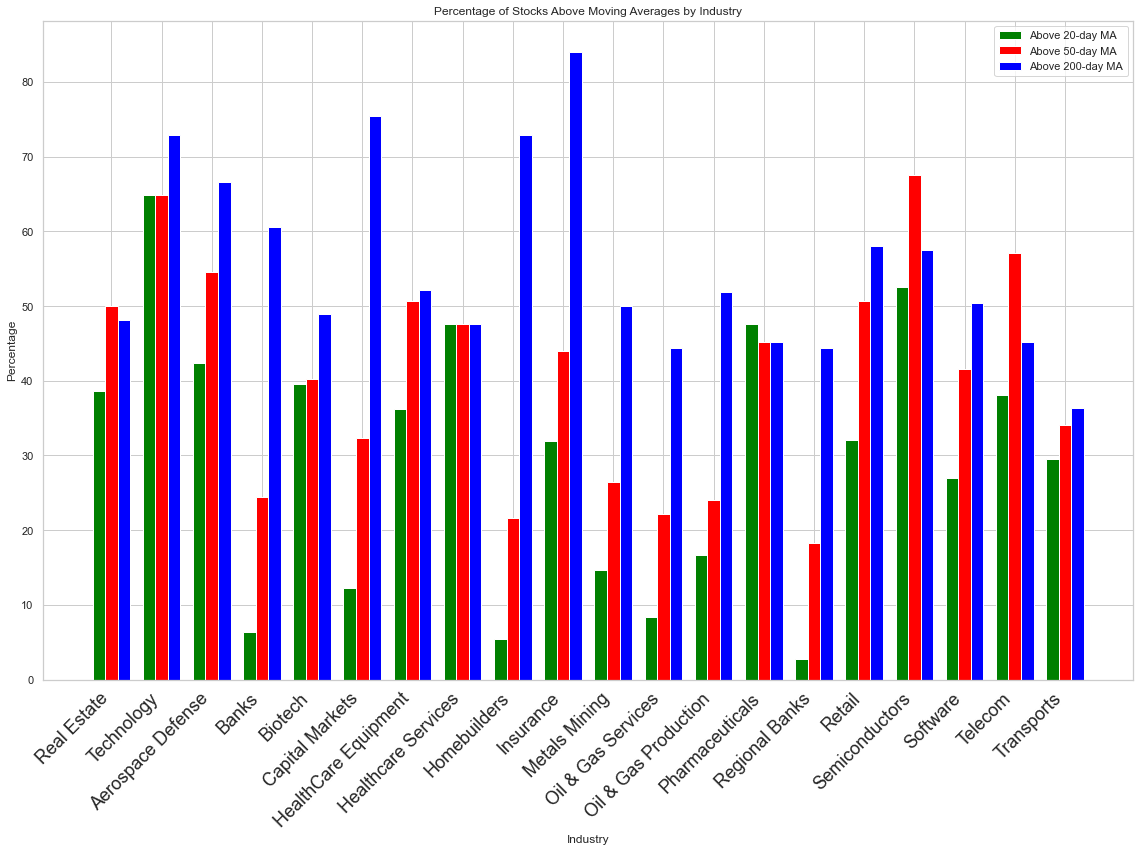

In [69]:
bar_width = 0.25
index = range(len(industries))


plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")


plt.bar(index, percentages_20, bar_width, label='Above 20-day MA', color='green')
plt.bar([i + bar_width for i in index], percentages_50, bar_width, label='Above 50-day MA', color='red')
plt.bar([i + 2 * bar_width for i in index], percentages_200, bar_width, label='Above 200-day MA', color='blue')

plt.title('Percentage of Stocks Above Moving Averages by Industry')
plt.xlabel('Industry')
plt.ylabel('Percentage')
plt.xticks([i + bar_width for i in index], industries, rotation=45, ha='right', fontsize=18)
plt.legend()
plt.tight_layout()
plt.show()

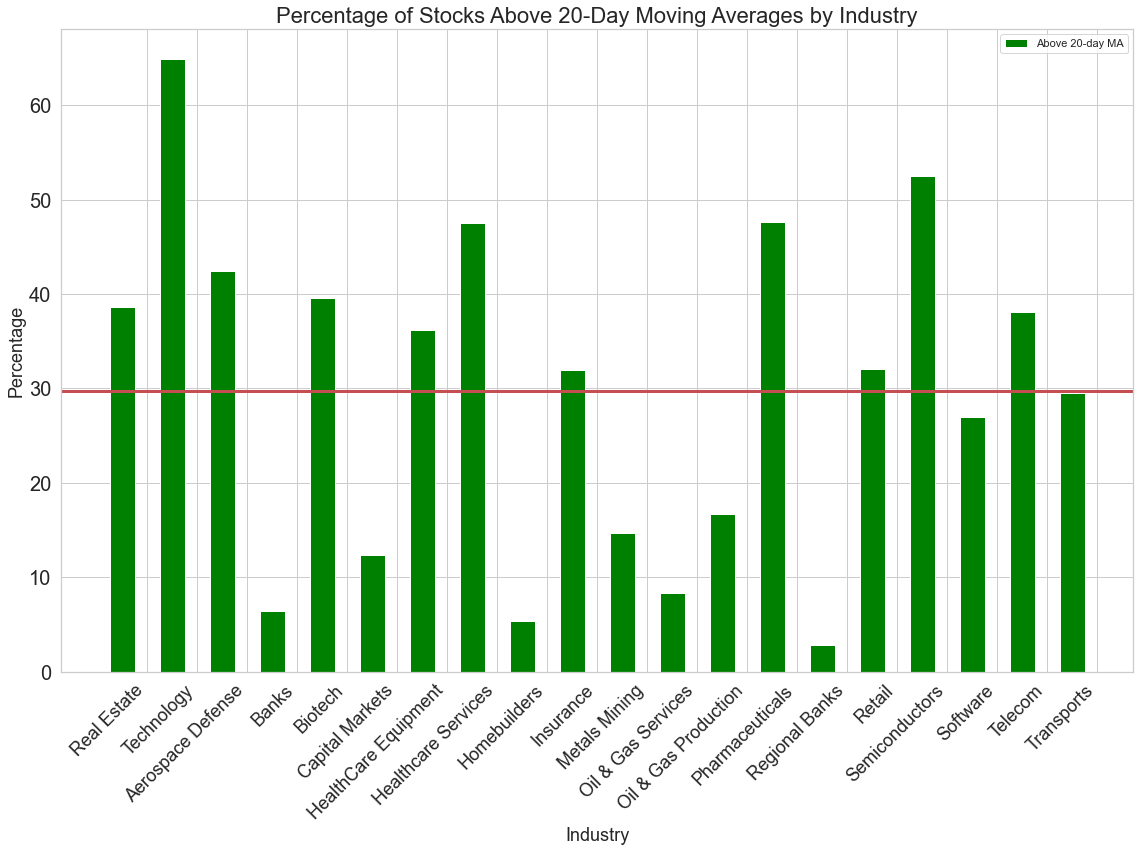

In [70]:
bar_width = 0.50
index = range(len(industries))


plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")


plt.bar(index, percentages_20, bar_width, label='Above 20-day MA', color='green')


plt.title('Percentage of Stocks Above 20-Day Moving Averages by Industry', fontsize = 22)
plt.xlabel('Industry', fontsize=18)
plt.ylabel('Percentage', fontsize= 18)
plt.xticks([i + bar_width for i in index], industries, rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize= 20)
plt.axhline(np.mean(percentages_20), color="r", linewidth=3)
plt.legend()
plt.tight_layout()
plt.show()

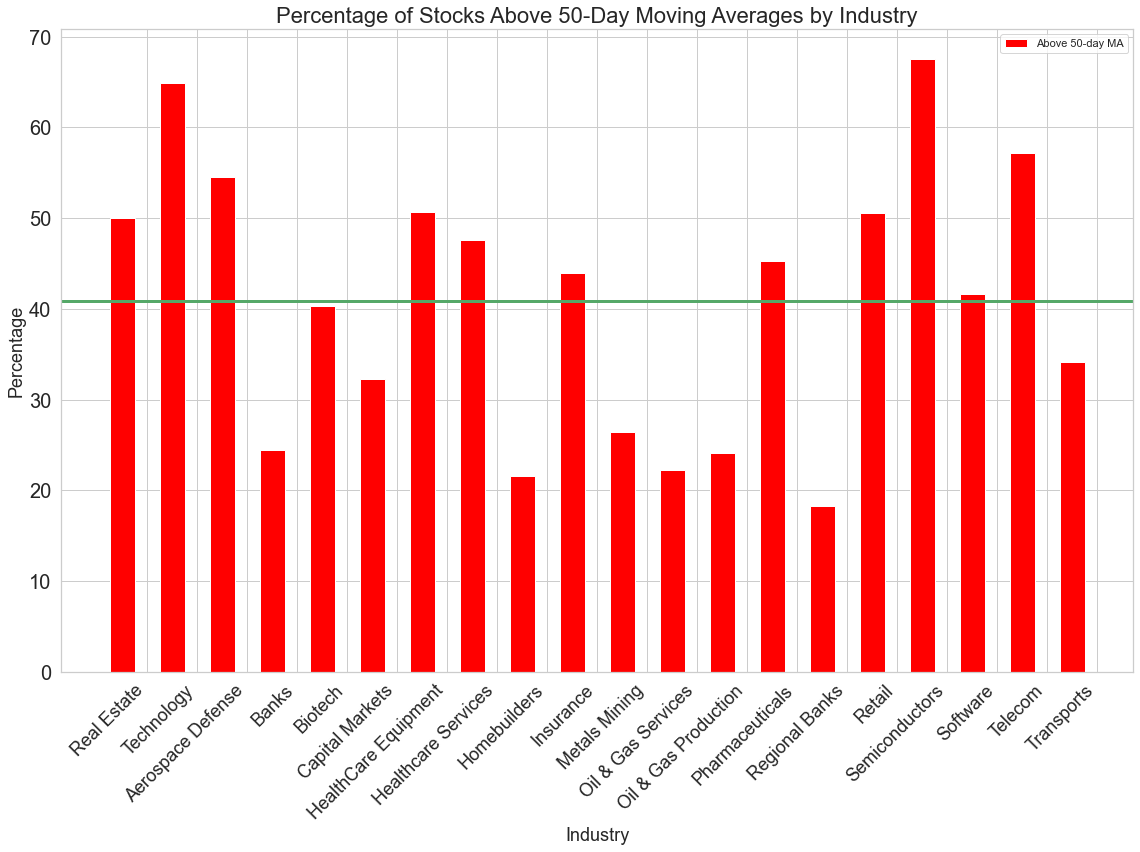

In [71]:
bar_width = 0.50
index = range(len(industries))


plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")


plt.bar(index, percentages_50, bar_width, label='Above 50-day MA', color='red')


plt.title('Percentage of Stocks Above 50-Day Moving Averages by Industry', fontsize = 22)
plt.xlabel('Industry', fontsize=18)
plt.ylabel('Percentage', fontsize= 18)
plt.xticks([i + bar_width for i in index], industries, rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize= 20)
plt.axhline(np.mean(percentages_50), color="g", linewidth=3)
plt.legend()
plt.tight_layout()
plt.show()

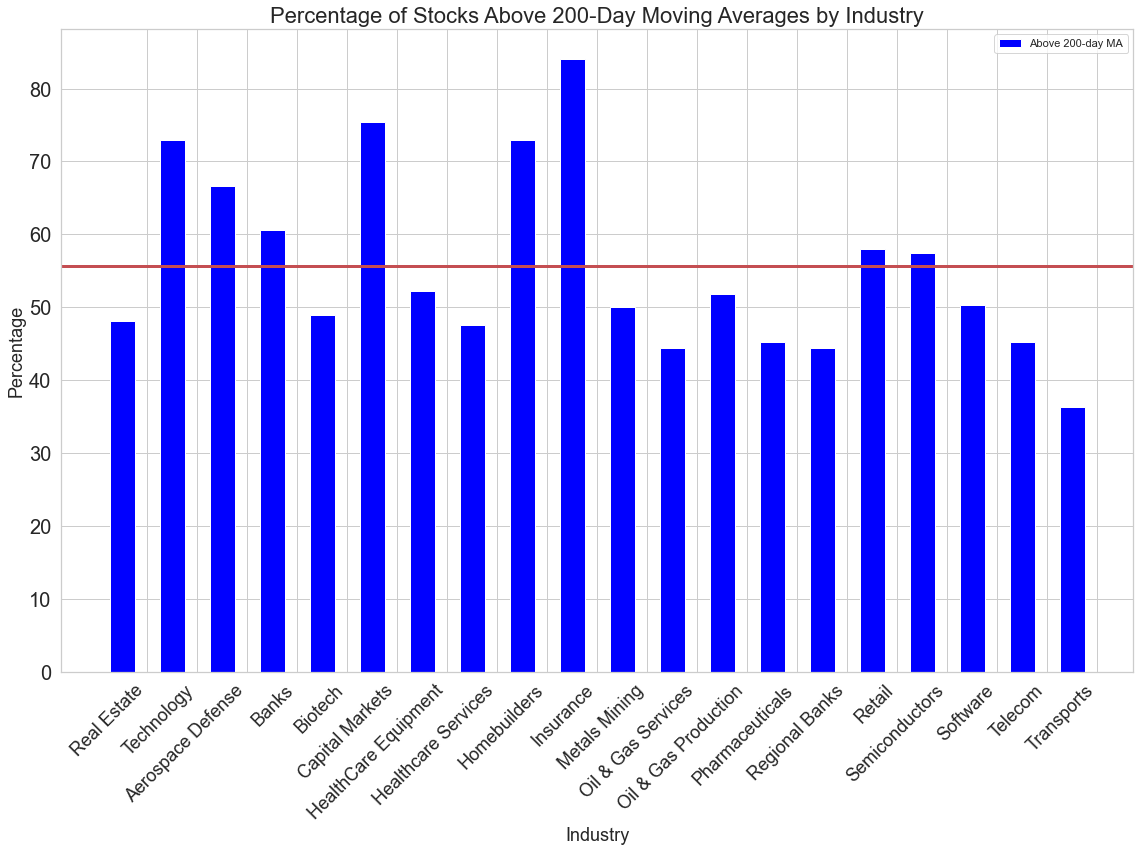

In [72]:
bar_width = 0.50
index = range(len(industries))


plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")


plt.bar(index, percentages_200, bar_width, label='Above 200-day MA', color='blue')


plt.title('Percentage of Stocks Above 200-Day Moving Averages by Industry', fontsize = 22)
plt.xlabel('Industry', fontsize=18)
plt.ylabel('Percentage', fontsize= 18)
plt.xticks([i + bar_width for i in index], industries, rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize= 20)
plt.axhline(np.mean(percentages_200), color="r", linewidth=3)
plt.legend()
plt.tight_layout()
plt.show()